# FERM 524 - Data Analytics and Statistical Learning - Final Group Project
# - Project by: N. Emir Eğilli, Burak Kargın, Z. Yiğit Atalay, S. Mert Şengün

## Instructions: You are expected to form groups of 3-4 people and to complete the Final Group Project.
## As a group you are expected to develop an analytical solution for automating loan allocation decisions. There is an Analytical Dataset prepared for you. Below you can find the metadata about the dataset provided to you.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, roc_curve, auc, RocCurveDisplay
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.impute import SimpleImputer
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings("ignore")

C:\Users\emir.e\Anaconda3\lib\site-packages\scipy\__init__.py:177: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1. Download the dataset and read the metadata descriptions. 

In [2]:
# Loading the dataset
df = pd.read_excel("LoanDefault_Dataset.xlsx")

# Display the first few rows of the dataset to understand its structure
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,New Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,258082,Short Term,746.0,746.0,950475.0,4 years,Rent,Debt Consolidation,6748.42,11.5,NaN,12,0,330429,815782,0.0,0.0
1,0000afa6-8902-4f8f-b870-25a8fdad0aeb,e49c1a82-a0f7-45e8-9f46-2f75c43f9fbc,Charged Off,541486,Long Term,NaN,NaN,NaN,6 years,Rent,Business Loan,10303.51,17.6,73.0,7,0,268337,372988,0.0,0.0
2,00020fb0-6b8a-4b3a-8c72-9c4c847e8cb6,c9decd06-16f7-44c3-b007-8776f2a9233d,Fully Paid,99999999,Short Term,742.0,742.0,1230440.0,3 years,Home Mortgage,Debt Consolidation,11073.96,26.8,NaN,11,0,168720,499642,0.0,0.0
3,00045ecd-59e9-4752-ba0d-679ff71692b3,b7bce684-b4b0-4b29-af66-eae316bce573,Fully Paid,260986,Short Term,734.0,734.0,1314838.0,10+ years,Own Home,Debt Consolidation,16325.94,30.3,NaN,7,0,189221,373890,0.0,0.0
4,0004f37b-5859-40f6-98d0-367aa3b3f3f1,f662b062-5fa5-463d-b5c0-4e36d09fcab1,Fully Paid,301818,Short Term,NaN,NaN,NaN,1 year,Own Home,Home Improvements,14770.22,13.6,2.0,12,0,127680,1173370,0.0,0.0


In [3]:
# Summary statistics for numerical features
numerical_summary = df.describe()

# Identifying categorical variables
categorical_variables = ['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']

# Generating summary statistics for categorical features
categorical_summary = {var: df[var].value_counts() for var in categorical_variables}

# Display numerical and categorical summaries
print(numerical_summary)
print(categorical_summary)

       Current Loan Amount  Credit Score  New Credit Score  Annual Income  \
count         7.000000e+04  56487.000000      56487.000000   5.648700e+04   
mean          1.177249e+07   1076.530565        716.227043   1.377729e+06   
std           3.179798e+07   1475.392414         28.437813   1.145671e+06   
min           1.080200e+04    585.000000        585.000000   8.109200e+04   
25%           1.798280e+05    705.000000        703.000000   8.484640e+05   
50%           3.130490e+05    724.000000        722.000000   1.171616e+06   
75%           5.252060e+05    741.000000        739.000000   1.651490e+06   
max           1.000000e+08   7510.000000        751.000000   1.655574e+08   

        Monthly Debt  Years of Credit History  Months since last delinquent  \
count   70000.000000             70000.000000                  32796.000000   
mean    18478.954550                18.196014                     34.888035   
std     12135.621181                 7.016945                     21.

## 2. Profile and explore the data via univariate and bivariate data analysis techniques. Create statistical summaries and visualizations to identify data quality problems, missing values, outliers, and uncover hidden patterns.

In [4]:
# Dropping unnecessary columns
df.drop(['Loan ID', 'Customer ID', 'Credit Score'], axis=1, inplace=True)

# Converting data types for categorical variables
categorical_columns = ['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']
df[categorical_columns] = df[categorical_columns].astype('category')

# Displaying DataFrame information to check the changes
print(df.info())

# Identifying missing values
missing_values = df.isnull().sum()
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Loan Status                   70000 non-null  category
 1   Current Loan Amount           70000 non-null  int64   
 2   Term                          70000 non-null  category
 3   New Credit Score              56487 non-null  float64 
 4   Annual Income                 56487 non-null  float64 
 5   Years in current job          67053 non-null  category
 6   Home Ownership                70000 non-null  category
 7   Purpose                       70000 non-null  category
 8   Monthly Debt                  70000 non-null  float64 
 9   Years of Credit History       70000 non-null  float64 
 10  Months since last delinquent  32796 non-null  float64 
 11  Number of Open Accounts       70000 non-null  int64   
 12  Number of Credit Problems     70000 non-null  

In [5]:
# Handling outliers in 'Current Loan Amount' identified as '99999999'
df_filtered = df[df['Current Loan Amount'] != 99999999]
average_loan_amount = df_filtered['Current Loan Amount'].mean()
df.loc[df['Current Loan Amount'] == 99999999, 'Current Loan Amount'] = average_loan_amount

# Initialize a SimpleImputer instance for mean imputation
imputer = SimpleImputer(strategy='mean')

# Imputing missing values with the mean for 'New Credit Score' and 'Annual Income'
df['New Credit Score'] = imputer.fit_transform(df[['New Credit Score']])
df['Annual Income'] = imputer.fit_transform(df[['Annual Income']])

# Cleaning 'Years in current job' to remove text and handle special cases
df['Years in current job'] = df['Years in current job'].astype(str).replace({'years': '', 'year': '', '< 1': '0', '10+': '10'}, regex=True)
df['Years in current job'] = pd.to_numeric(df['Years in current job'], errors='coerce')  # Convert to numeric, making unconvertible values NaN

# Imputing missing values in 'Years in current job' and 'Months since last delinquent'
df['Years in current job'] = imputer.fit_transform(df[['Years in current job']])
df['Months since last delinquent'] = imputer.fit_transform(df[['Months since last delinquent']])

# Filling NA values in 'Bankruptcies' and 'Tax Liens' with 0, assuming majority are 0
df['Bankruptcies'].fillna(0, inplace=True)
df['Tax Liens'].fillna(0, inplace=True)

# Checking for any remaining null values in the dataset
remaining_nulls = df.isnull().sum()
print("Remaining null values in each column:\n", remaining_nulls)

# Displaying the first few rows of the cleaned DataFrame for verification
print("\nFirst few rows of the cleaned DataFrame:")
print(df.head())

Remaining null values in each column:
 Loan Status                     0
Current Loan Amount             0
Term                            0
New Credit Score                0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

First few rows of the cleaned DataFrame:
   Loan Status  Current Loan Amount        Term  New Credit Score  \
0   Fully Paid        258082.000000  Short Term        746.000000   
1  Charged Off        541486.000000   Long Term        716.227043   
2   Fully Paid        312729.891337  Short Term        742.000000   
3   Fully Paid        260986.000000  Short Term     

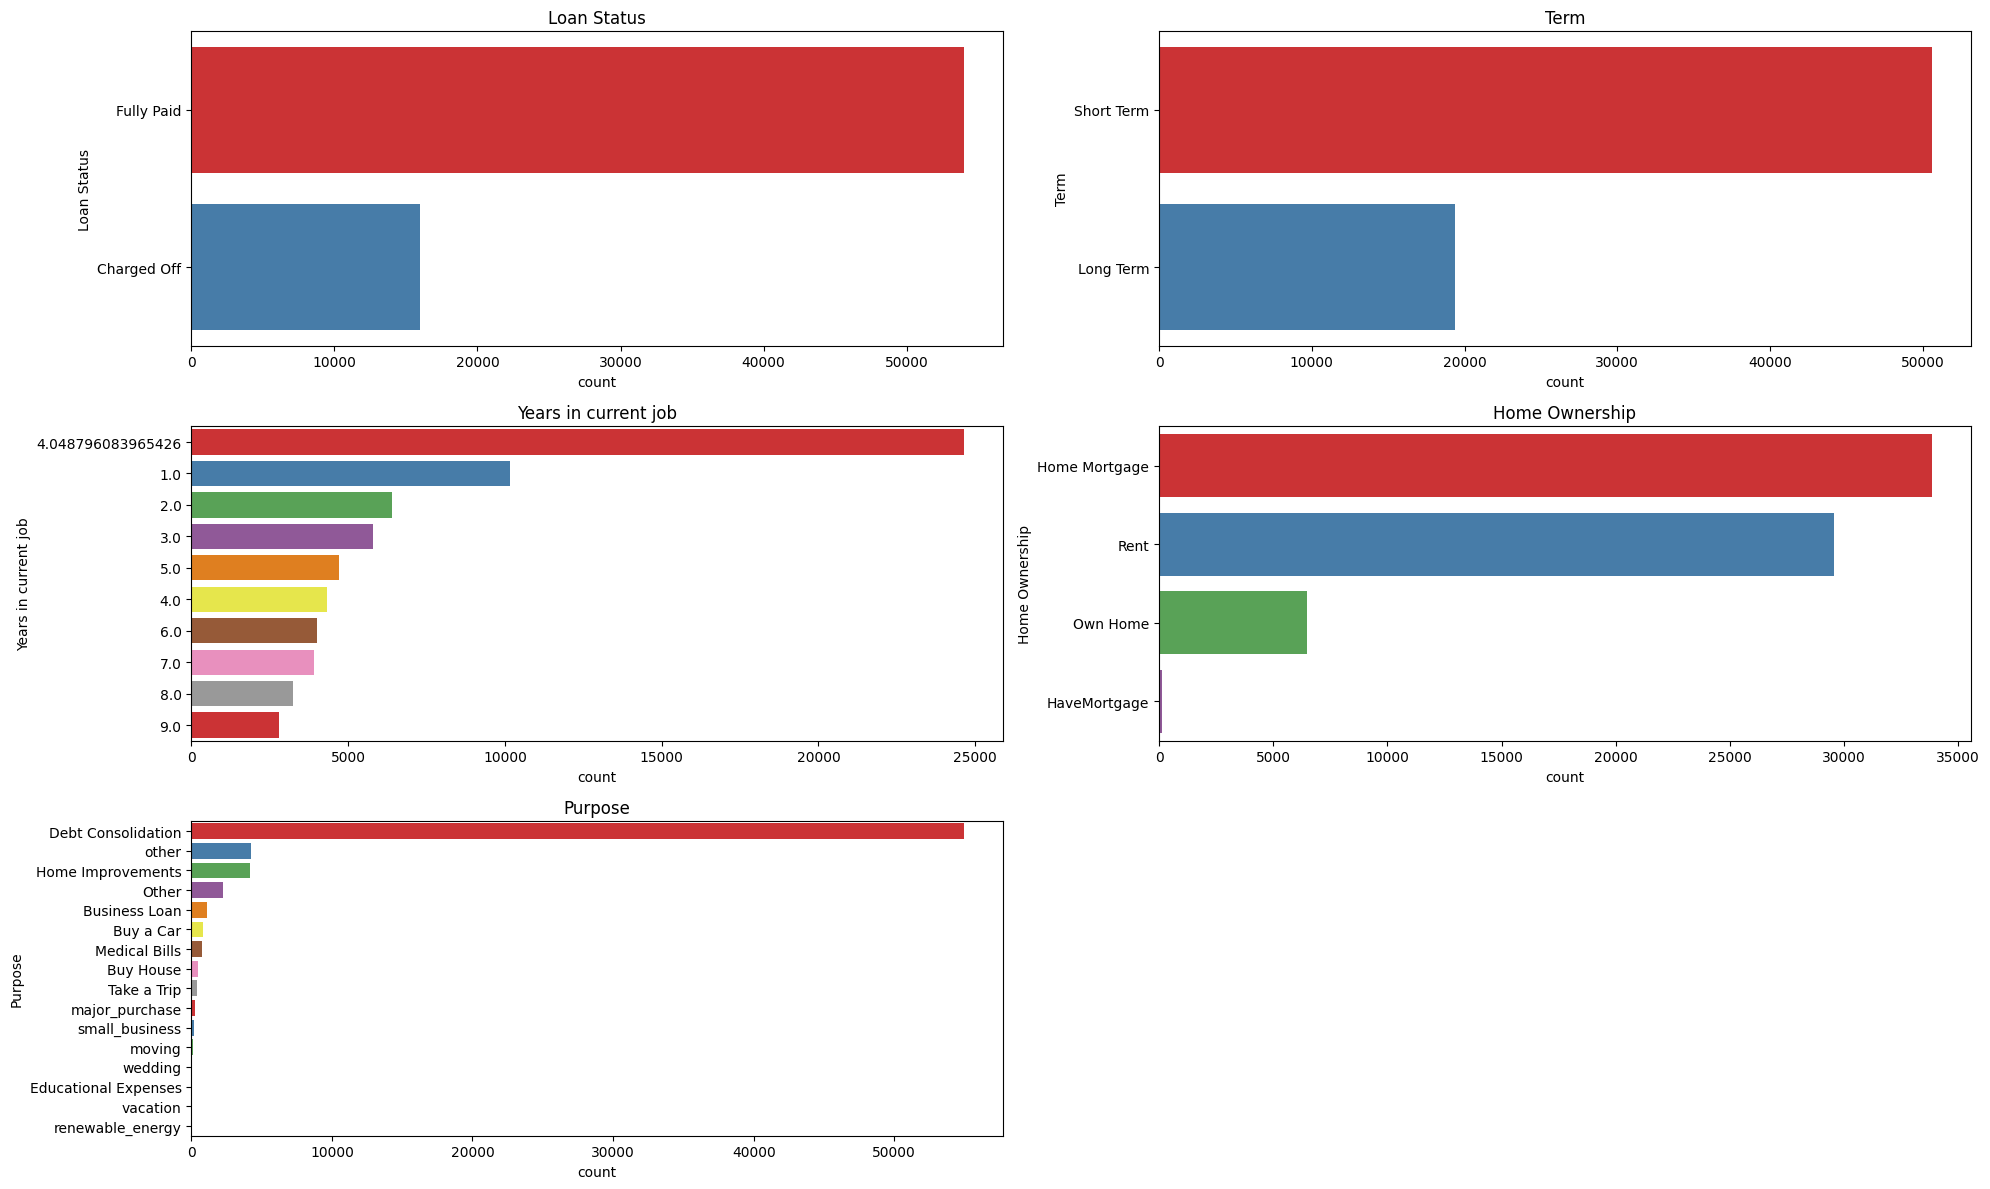

In [6]:
categorical_variables = ['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']

# Set the size of the overall figure
plt.figure(figsize=(20, 12))

# Loop through each categorical variable and create a count plot
for i, var in enumerate(categorical_variables, 1):
    plt.subplot(3, 2, i)  
    sns.countplot(y=df[var], order=df[var].value_counts().index, palette='Set1')  
    plt.title(var)  # Set the title for each subplot
    plt.tight_layout() 

plt.show()

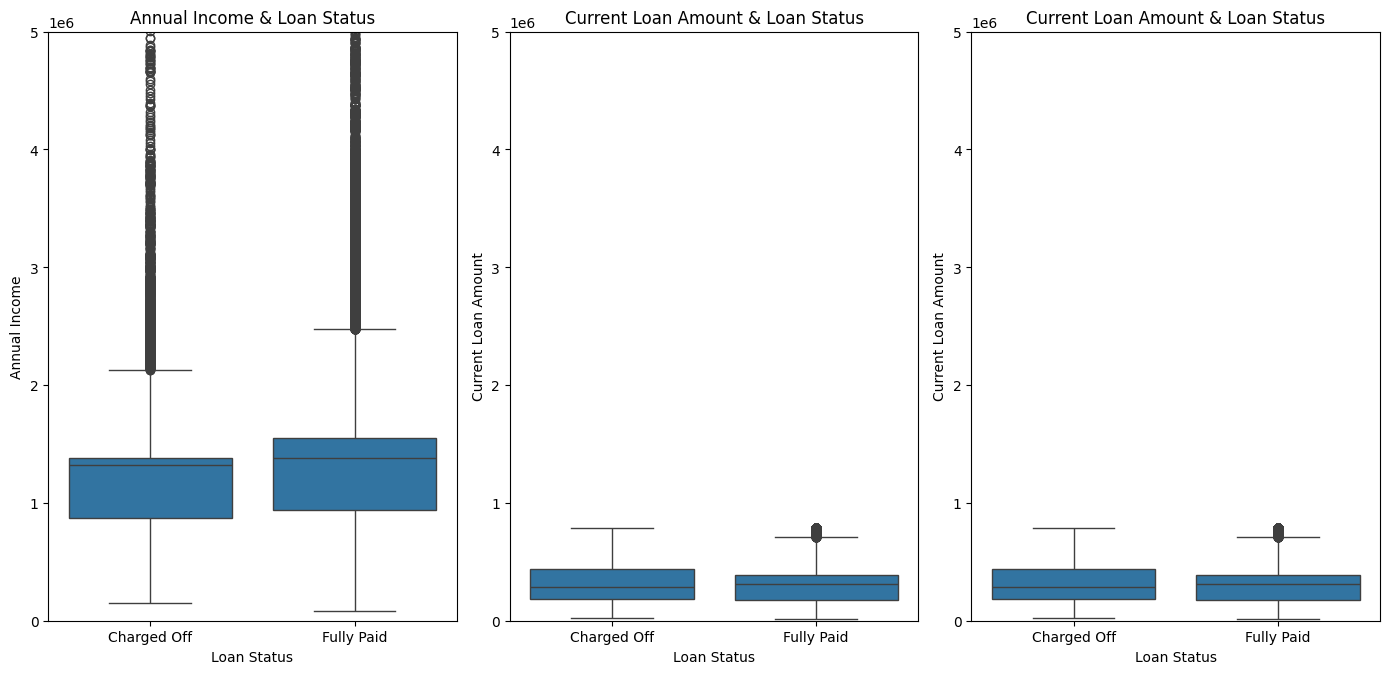

In [7]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
sns.boxplot(x='Loan Status', y='Annual Income', data=df)
plt.title('Annual Income & Loan Status')
plt.ylim(0, 5000000)  

plt.subplot(1, 3, 2)
sns.boxplot(x='Loan Status', y='Current Loan Amount', data=df)
plt.title('Current Loan Amount & Loan Status')
plt.ylim(0, 5000000) 

plt.subplot(1, 3, 3)
sns.boxplot(x='Loan Status', y='Current Loan Amount', data=df)
plt.title('Current Loan Amount & Loan Status')
plt.ylim(0, 5000000) 

plt.tight_layout()
plt.show()

       Current Loan Amount  New Credit Score  Annual Income  \
count         56000.000000      56000.000000   5.600000e+04   
mean         313112.197850        716.184362   1.377663e+06   
std          175669.636981         25.530271   1.072361e+06   
min           10802.000000        585.000000   9.703300e+04   
25%          179718.000000        709.000000   9.308100e+05   
50%          312729.891337        716.227043   1.371173e+06   
75%          403766.000000        735.000000   1.514913e+06   
max          789250.000000        751.000000   1.655574e+08   

       Years in current job   Monthly Debt  Years of Credit History  \
count          56000.000000   56000.000000             56000.000000   
mean               4.055023   18490.974919                18.188529   
std                2.072622   12116.462185                 7.021083   
min                1.000000       0.000000                 3.600000   
25%                3.000000   10193.215000                13.400000   
50%   

<Figure size 1500x1000 with 0 Axes>

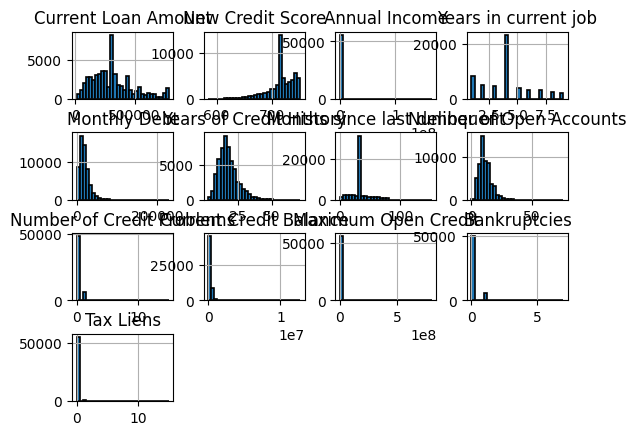

In [8]:
# Splitting the DataFrame into training and test sets
df_train = df.sample(frac=0.8, random_state=42)  # Using a random state for reproducibility
df_test = df.drop(df_train.index)

# Resetting indices for both training and test sets
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Descriptive statistics for numerical columns in the training set
print(df_train.describe(include='number'))

# Calculate the number of numerical columns for histogram layout
num_numerical_cols = len(df_train.select_dtypes(include='number').columns)

# Define the number of columns for your subplots
num_cols = 4

# Calculate the number of rows needed to accommodate all numerical columns
num_rows = math.ceil(num_numerical_cols / num_cols)

# Visualizing distributions of numerical columns in the training set via histograms
plt.figure(figsize=(15, 10))  # Setting the figure size for better readability
df_train.select_dtypes(include='number').hist(bins=30, edgecolor='black', linewidth=1.2, layout=(num_rows, num_cols))
plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Adjusting space between histograms for better readability
plt.show()

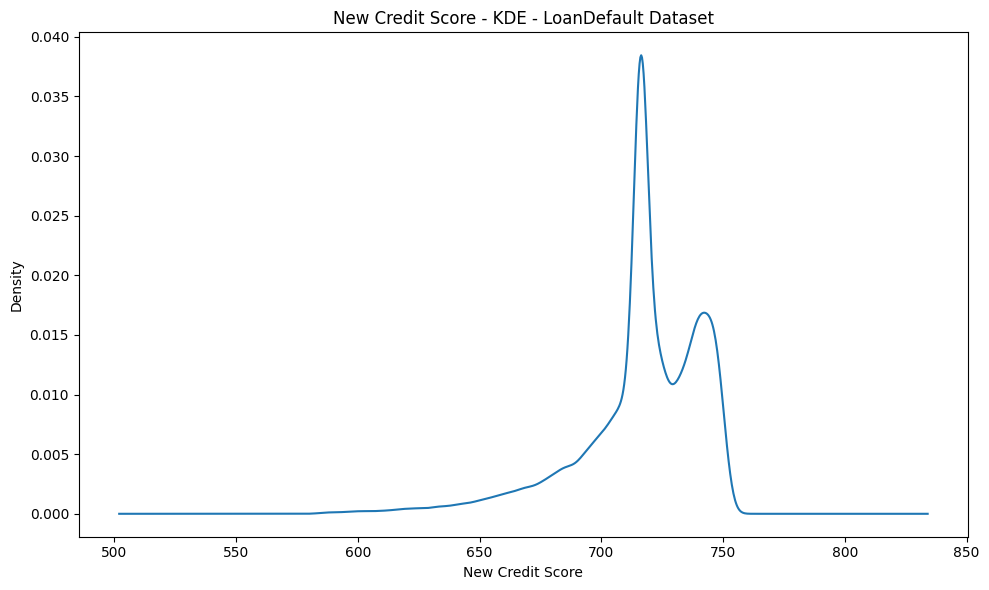

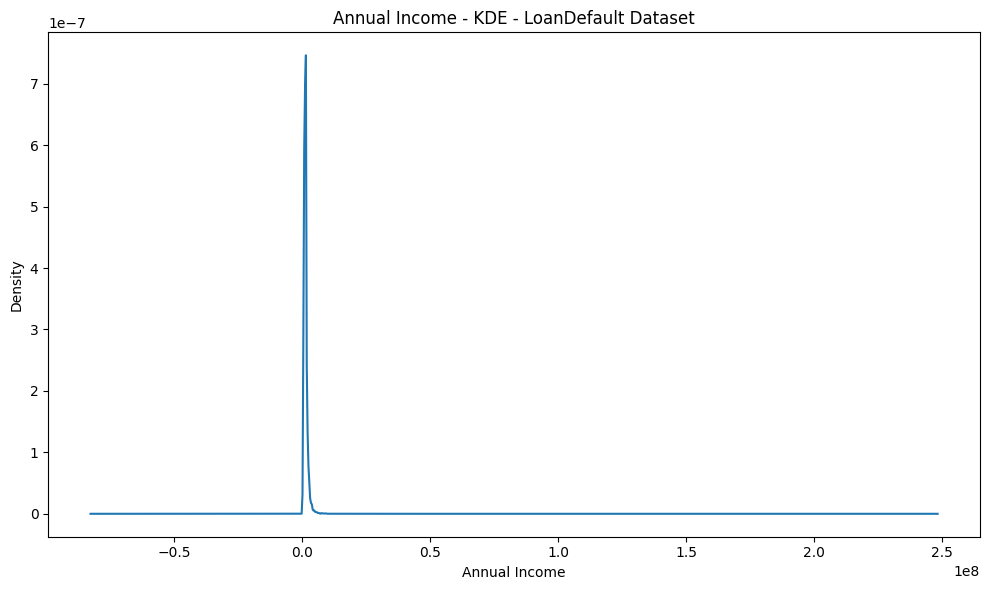

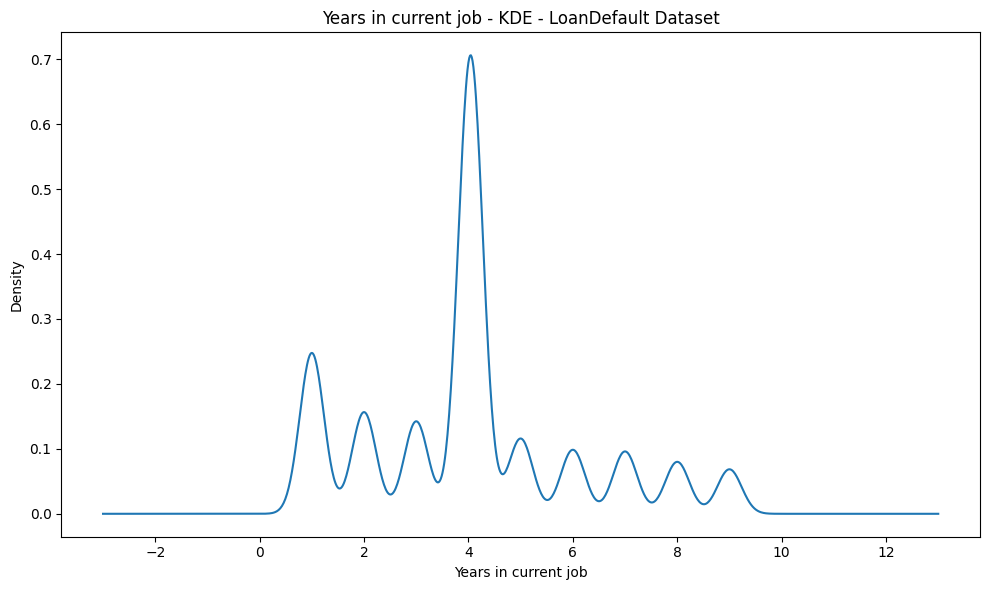

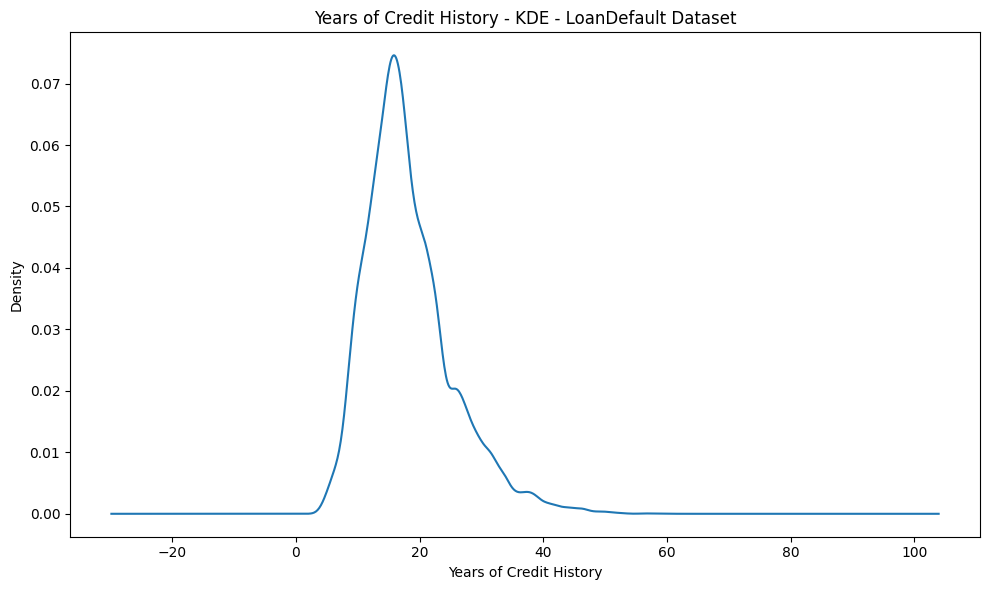

In [9]:
# List of columns to plot
columns_to_plot = ['New Credit Score', 'Annual Income', 'Years in current job', 'Years of Credit History']

for col in columns_to_plot:
    plt.figure(figsize=(10, 6))  # Setting the figure size for better readability
    df_train[col].plot(kind='kde')  # Specifying 'kde' directly for Kernel Density Estimate plots
    
    # Setting the title and labels
    plt.title(f'{col} - KDE - LoanDefault Dataset')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

Descriptive Statistics for Categorical Columns:
       Loan Status        Term Home Ownership             Purpose
count        56000       56000          56000               56000
unique           2           2              4                  16
top     Fully Paid  Short Term  Home Mortgage  Debt Consolidation
freq         43209       40469          27096               43941

Frequency and Proportion for Loan Status:
             Count  Proportion
Loan Status                   
Fully Paid   43209    0.771589
Charged Off  12791    0.228411

Frequency and Proportion for Term:
            Count  Proportion
Term                         
Short Term  40469    0.722661
Long Term   15531    0.277339

Frequency and Proportion for Home Ownership:
                Count  Proportion
Home Ownership                   
Home Mortgage   27096    0.483857
Rent            23665    0.422589
Own Home         5138    0.091750
HaveMortgage      101    0.001804

Frequency and Proportion for Purpose:
          

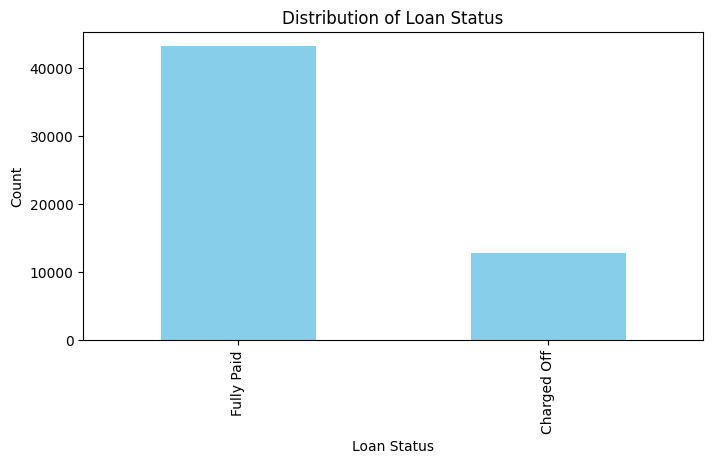

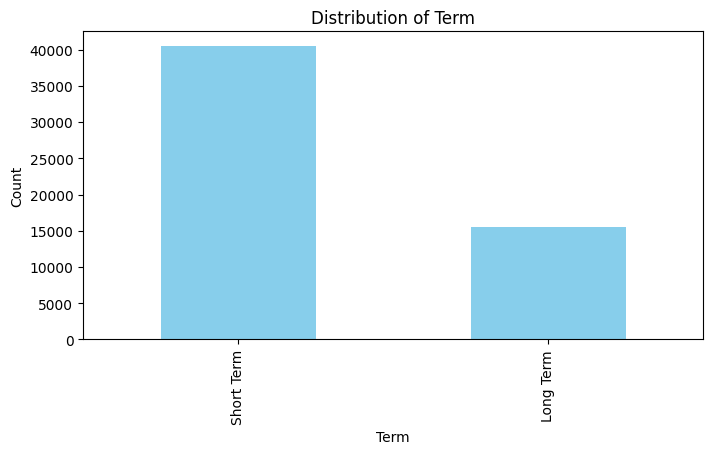

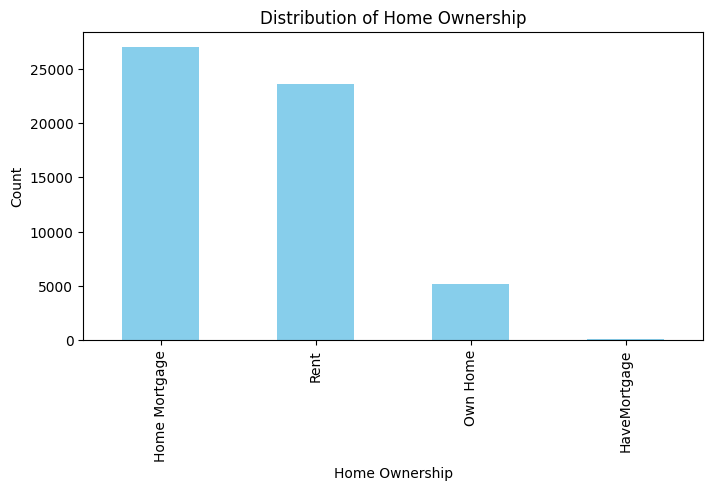

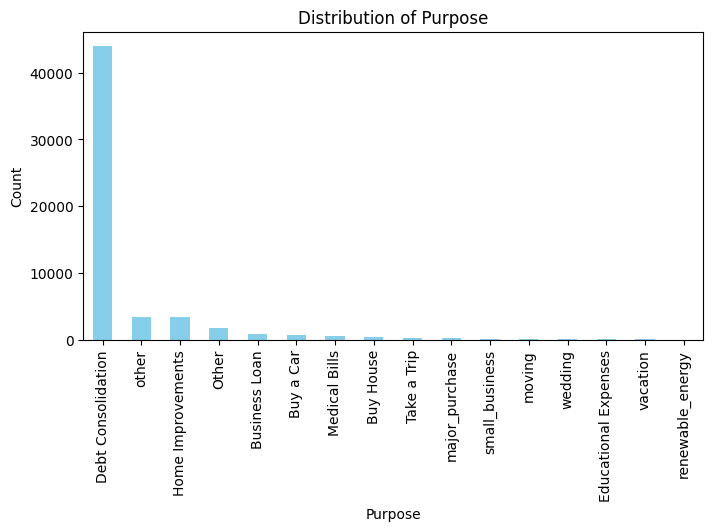

In [10]:
# Categorical Univariate Analysis
# Displaying descriptive statistics for categorical columns
print("Descriptive Statistics for Categorical Columns:")
print(df_train.describe(include='category'))

# Looping through categorical columns to display frequency and relative frequency tables
for col in df_train.select_dtypes(include='category').columns:
    # Combining count and proportion in one DataFrame for readability
    freq_df = pd.concat([
        df_train[col].value_counts(), 
        df_train[col].value_counts(normalize=True)
    ], axis=1, keys=['Count', 'Proportion'])
    
    print(f'\nFrequency and Proportion for {col}:')
    print(freq_df)

# Visualizing the distribution of categories for each categorical variable
for col in df_train.select_dtypes(include='category').columns:
    plt.figure(figsize=(8, 4))  # Setting the figure size for better readability
    df_train[col].value_counts().plot(kind='bar', color='skyblue')  # Creating a bar plot
    plt.title(f'Distribution of {col}')  # Setting the title of the plot
    plt.xlabel(col)  # Setting the x-label as the column name
    plt.ylabel('Count')  # Setting the y-label as 'Count'
    plt.xticks(rotation=90)  # Rotating the x-ticks for better readability
    plt.show()


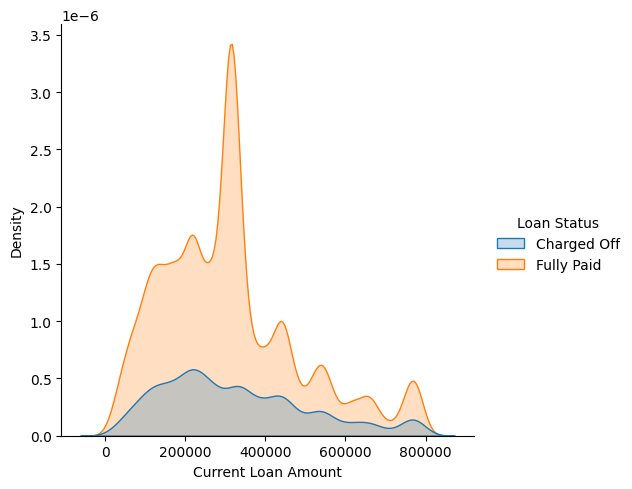

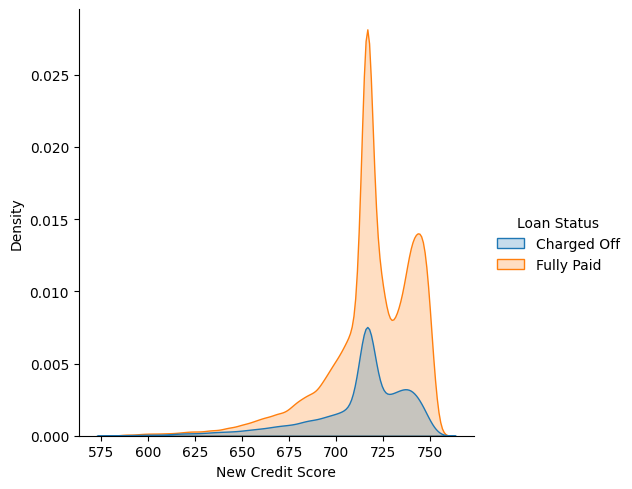

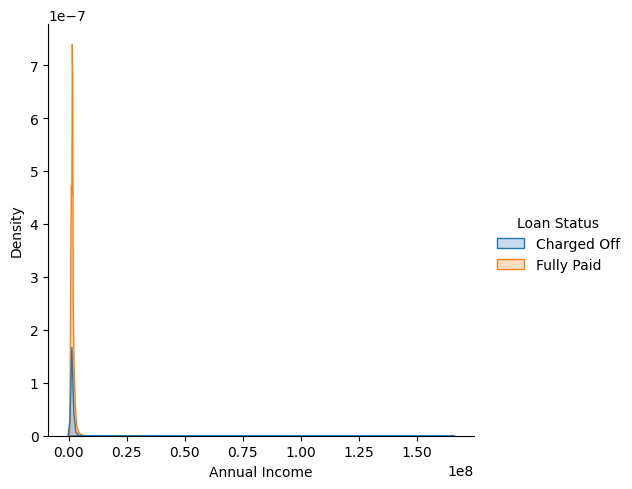

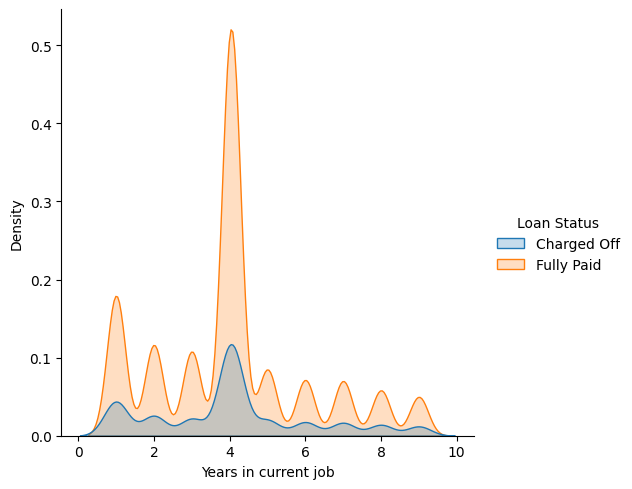

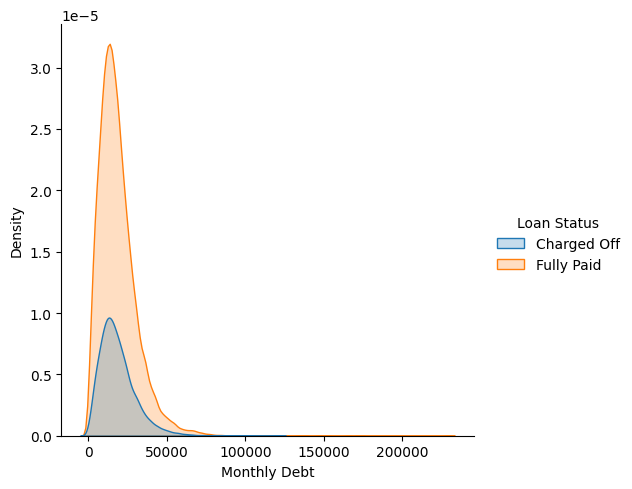

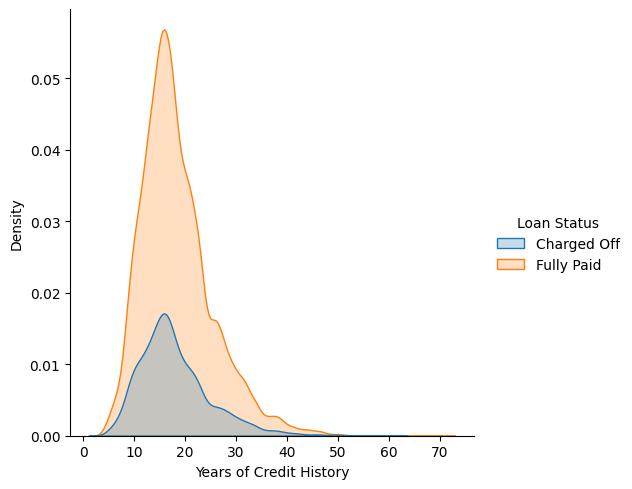

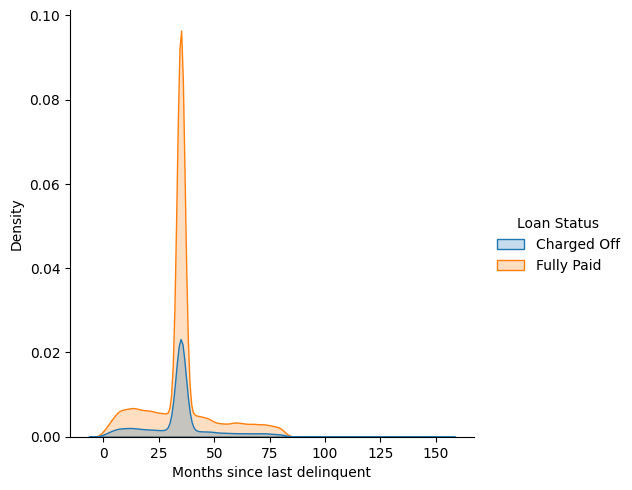

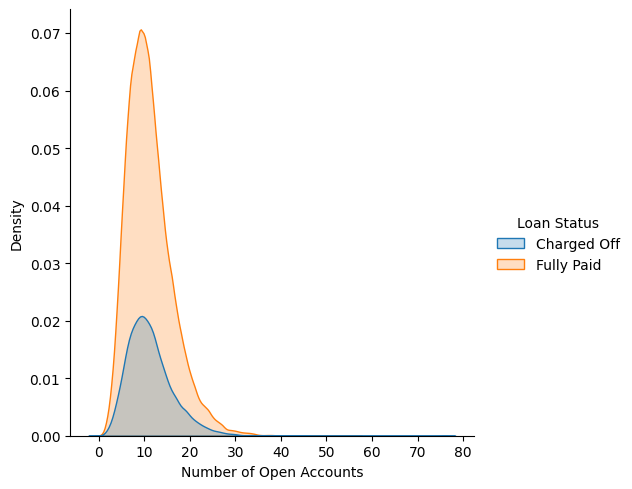

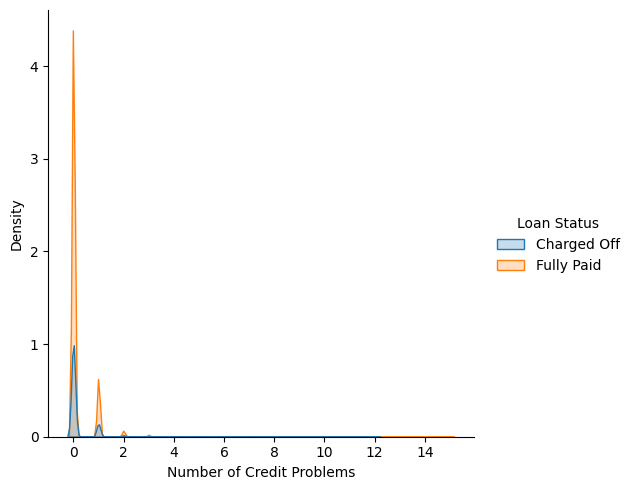

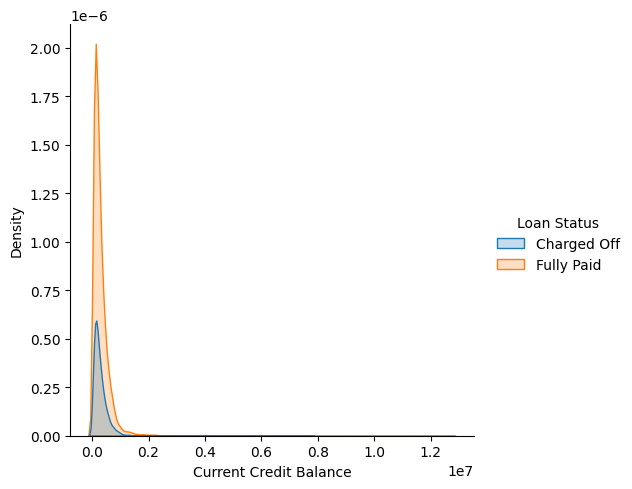

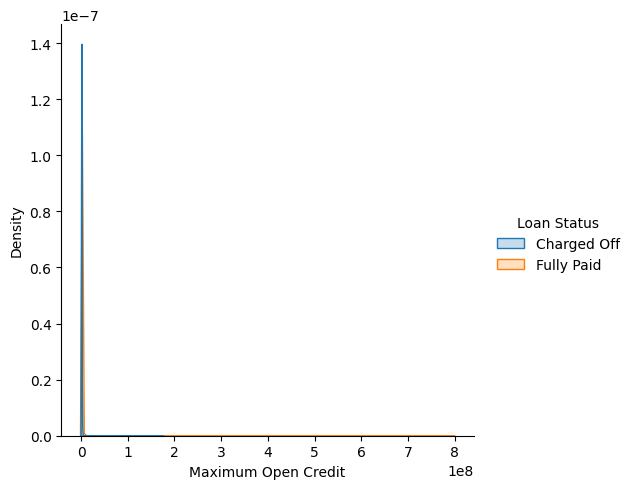

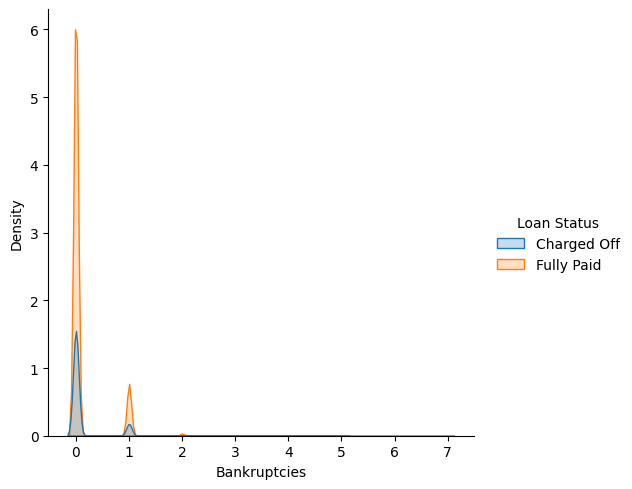

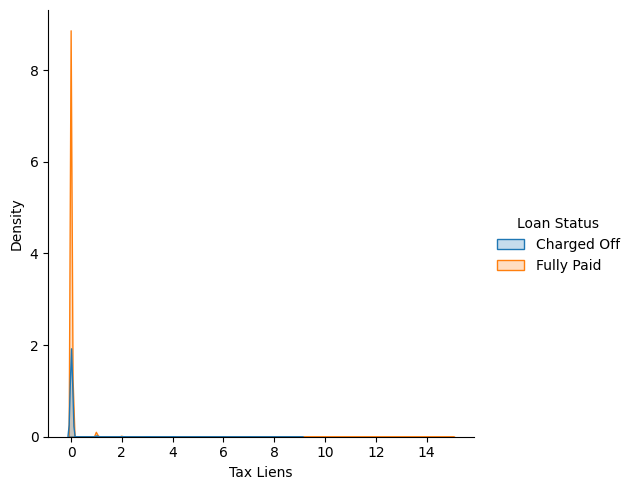

In [11]:
# Categorical vs Numerical Bivariate Analysis
for i in df_train.select_dtypes(include='number').columns:
    sns.displot(data=df_train,x=i,hue='Loan Status',kind='kde',fill=True)
    plt.show()

In [12]:
categorical_columns = ['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']

# Loop through the list of categorical columns and print descriptive statistics for each group
for category in categorical_columns:
    print(f'Descriptive Statistics for {category}:')
    display(df_train.groupby(category).describe())  # Use 'display' for better formatting in Jupyter Notebooks
    print('\n')  # Add extra space for readability


Descriptive Statistics for Loan Status:


Current Loan Amount                                         \
                          count           mean            std      min   
Loan Status                                                              
Charged Off             12791.0  325530.659839  185606.077009  21450.0   
Fully Paid              43209.0  309436.006610  172449.274068  10802.0   

                                                         New Credit Score  \
                  25%            50%       75%       max            count   
Loan Status                                                                 
Charged Off  180180.0  289916.000000  440770.0  789250.0          12791.0   
Fully Paid   179652.0  312729.891337  392194.0  789250.0          43209.0   

                         ... Bankruptcies      Tax Liens                      \
                   mean  ...          75%  max     count      mean       std   
Loan Status              ...                                                   
Charged Off  711.700409  ...          0.0  5.0   12791.0  0.037214  0.305832   
Fully Paid   717.511730  ...          0.0  7.0   43209.0  0.028929  0.256188   

                                       
             min  25%  50%  75%   max  
Loan Status                            
Charged Off  0.0  0.0  0.0  0.0   9.0  
Fully Paid   0.0  0.0  0.0  0.0  15.0  

[2 rows x 104 columns]



Descriptive Statistics for Term:


Current Loan Amount                                         \
                         count           mean            std      min   
Term                                                                    
Long Term              15531.0  427324.259898  167522.650133  21802.0   
Short Term             40469.0  269280.436857  158133.045720  10802.0   

                                                        New Credit Score  \
                      25%       50%       75%       max            count   
Term                                                                       
Long Term   312729.891337  397584.0  539407.0  789250.0          15531.0   
Short Term  153538.000000  246510.0  326128.0  789250.0          40469.0   

                        ... Bankruptcies      Tax Liens                      \
                  mean  ...          75%  max     count      mean       std   
Term                    ...                                                   
Long Term   698.754733  ...          0.0  5.0   15531.0  0.030455  0.263294   
Short Term  722.873422  ...          0.0  7.0   40469.0  0.030962  0.270278   

                                      
            min  25%  50%  75%   max  
Term                                  
Long Term   0.0  0.0  0.0  0.0   9.0  
Short Term  0.0  0.0  0.0  0.0  15.0  

[2 rows x 104 columns]



Descriptive Statistics for Years in current job:


Current Loan Amount                                \
                                   count           mean            std   
Years in current job                                                     
1.000000                          8095.0  290344.706768  172686.304466   
2.000000                          5116.0  297929.138045  170680.259768   
3.000000                          4653.0  299710.313210  168726.115306   
4.000000                          3460.0  295729.621152  166786.513782   
4.048796                         19680.0  330661.032789  181595.375243   
5.000000                          3784.0  307840.429713  171224.758426   
6.000000                          3221.0  314825.574265  174577.091132   
7.000000                          3138.0  318726.839260  172769.017954   
8.000000                          2614.0  320167.469283  171683.780675   
9.000000                          2239.0  320923.429747  172551.231920   

                                                                            \
                          min       25%            50%       75%       max   
Years in current job                                                         
1.000000              10802.0  158906.0  267322.000000  361086.0  789096.0   
2.000000              21538.0  172656.0  287914.000000  375507.0  789250.0   
3.000000              21538.0  175978.0  284658.000000  376882.0  789184.0   
4.000000              21670.0  173492.0  282194.000000  371090.5  788260.0   
4.048796              21450.0  200436.5  312729.891337  435864.0  789250.0   
5.000000              21604.0  178222.0  308473.000000  394306.0  787798.0   
6.000000              21450.0  181676.0  312729.891337  402292.0  789096.0   
7.000000              21978.0  196350.0  312729.891337  412725.5  788722.0   
8.000000              21472.0  198627.0  312729.891337  414100.5  788876.0   
9.000000              21890.0  198000.0  312729.891337  418286.0  788942.0   

                     New Credit Score              ... Bankruptcies       \
                                count        mean  ...          75%  max   
Years in current job                               ...                     
1.000000                       8095.0  716.527525  ...          0.0  5.0   
2.000000                       5116.0  716.838156  ...          0.0  3.0   
3.000000                       4653.0  716.192961  ...          0.0  5.0   
4.000000                       3460.0  716.798233  ...          0.0  4.0   
4.048796                      19680.0  715.870217  ...          0.0  5.0   
5.000000                       3784.0  716.010743  ...          0.0  7.0   
6.000000                       3221.0  716.064786  ...          0.0  4.0   
7.000000                       3138.0  716.150964  ...          0.0  6.0   
8.000000                       2614.0  716.190243  ...          0.0  3.0   
9.000000                       2239.0  715.749887  ...          0.0  2.0   

                     Tax Liens                                                
                         count      mean       std  min  25%  50%  75%   max  
Years in current job                                                          
1.000000                8095.0  0.023224  0.218841  0.0  0.0  0.0  0.0   7.0  
2.000000                5116.0  0.025215  0.227935  0.0  0.0  0.0  0.0   5.0  
3.000000                4653.0  0.024930  0.249293  0.0  0.0  0.0  0.0   7.0  
4.000000                3460.0  0.023988  0.196094  0.0  0.0  0.0  0.0   5.0  
4.048796               19680.0  0.037246  0.314116  0.0  0.0  0.0  0.0  15.0  
5.000000                3784.0  0.030920  0.241910  0.0  0.0  0.0  0.0   7.0  
6.000000                3221.0  0.026079  0.200782  0.0  0.0  0.0  0.0   3.0  
7.000000                3138.0  0.037604  0.320166  0.0  0.0  0.0  0.0   7.0  
8.000000                2614.0  0.029457  0.258593  0.0  0.0  0.0  0.0   6.0  
9.000000                2239.0  0.036177  0.272405  0.0  0.0  0.0  0.0   4.0  

[10 rows x 96 columns]



Descriptive Statistics for Home Ownership:


Current Loan Amount                                         \
                             count           mean            std      min   
Home Ownership                                                              
HaveMortgage                 101.0  147657.448133  130181.670980  10802.0   
Home Mortgage              27096.0  347391.218583  183027.711904  21472.0   
Own Home                    5138.0  300506.230114  175003.009041  21472.0   
Rent                       23665.0  277306.410662  158657.992714  15422.0   

                                                            New Credit Score  \
                     25%            50%       75%       max            count   
Home Ownership                                                                 
HaveMortgage     53174.0  106612.000000  216590.0  733106.0            101.0   
Home Mortgage   217404.0  312729.891337  448052.0  789250.0          27096.0   
Own Home        169917.0  286044.000000  386402.5  789030.0           5138.0   
Rent            157564.0  262262.000000  338844.0  789250.0          23665.0   

                            ... Bankruptcies      Tax Liens            \
                      mean  ...          75%  max     count      mean   
Home Ownership              ...                                         
HaveMortgage    715.216433  ...          0.0  1.0     101.0  0.099010   
Home Mortgage   717.206279  ...          0.0  5.0   27096.0  0.032403   
Own Home        715.526392  ...          0.0  5.0    5138.0  0.037563   
Rent            715.161270  ...          0.0  7.0   23665.0  0.027255   

                                                    
                     std  min  25%  50%  75%   max  
Home Ownership                                      
HaveMortgage    0.574542  0.0  0.0  0.0  0.0   4.0  
Home Mortgage   0.273823  0.0  0.0  0.0  0.0   9.0  
Own Home        0.355099  0.0  0.0  0.0  0.0  15.0  
Rent            0.236128  0.0  0.0  0.0  0.0   6.0  

[4 rows x 104 columns]



Descriptive Statistics for Purpose:


Current Loan Amount                                \
                                   count           mean            std   
Purpose                                                                  
Business Loan                      874.0  330468.234233  199426.124758   
Buy House                          382.0  327577.168054  192859.080146   
Buy a Car                          695.0  199769.765973  123925.050932   
Debt Consolidation               43941.0  327759.324434  172121.622345   
Educational Expenses                53.0  200457.340038  109117.128901   
Home Improvements                 3333.0  313676.753418  188553.683056   
Medical Bills                      631.0  217759.996077  153405.222068   
Other                             1818.0  237631.630798  169640.752649   
Take a Trip                        304.0  153580.759728  125953.015455   
major_purchase                     207.0  240261.669611  183060.854868   
moving                              74.0  204660.931262  176725.174501   
other                             3400.0  223802.824057  156796.999122   
renewable_energy                     7.0  238564.857143  191026.915262   
small_business                     167.0  321199.859154  194693.655944   
vacation                            46.0  170070.988189  124536.761594   
wedding                             68.0  268328.804354  190465.878254   

                                                                       \
                          min       25%            50%            75%   
Purpose                                                                 
Business Loan         21978.0  175796.5  312729.891337  443773.000000   
Buy House             22044.0  184800.0  312729.891337  443949.000000   
Buy a Car             21670.0  106095.0  166056.000000  312729.891337   
Debt Consolidation    15422.0  208560.0  312729.891337  429264.000000   
Educational Expenses  53284.0  110330.0  173734.000000  312729.891337   
Home Improvements     21516.0  172502.0  306636.000000  432476.000000   
Medical Bills         21450.0  101651.0  181038.000000  312729.891337   
Other                 21472.0  108586.5  209330.000000  312729.891337   
Take a Trip           10802.0   60478.0  110066.000000  219054.000000   
major_purchase        21516.0  109846.0  179300.000000  312729.891337   
moving                21868.0   76406.0  142252.000000  312729.891337   
other                 21098.0  107360.0  194645.000000  312729.891337   
renewable_energy      21912.0  111144.0  207702.000000  358380.000000   
small_business        38016.0  179454.0  292380.000000  443817.000000   
vacation              21758.0   55544.5  132561.000000  251086.000000   
wedding               21890.0  126153.5  217448.000000  315639.418503   

                               New Credit Score              ... Bankruptcies  \
                           max            count        mean  ...          75%   
Purpose                                                      ...                
Business Loan         789096.0            874.0  704.062833  ...          0.0   
Buy House             787094.0            382.0  702.403102  ...          0.0   
Buy a Car             788480.0            695.0  723.292759  ...          0.0   
Debt Consolidation    789250.0          43941.0  717.238280  ...          0.0   
Educational Expenses  553850.0             53.0  722.179198  ...          0.0   
Home Improvements     788788.0           3333.0  717.227419  ...          0.0   
Medical Bills         785708.0            631.0  710.058383  ...          0.0   
Other                 788876.0           1818.0  714.656820  ...          0.0   
Take a Trip           733106.0            304.0  713.868975  ...          0.0   
major_purchase        785554.0            207.0  720.032018  ...          0.0   
moving                763620.0             74.0  700.002414  ...          0.0   
other                 787952.0           3400.0  707.729133  ...          0.0   
renewable_e

<AxesSubplot: xlabel='Term', ylabel='Loan Status'>

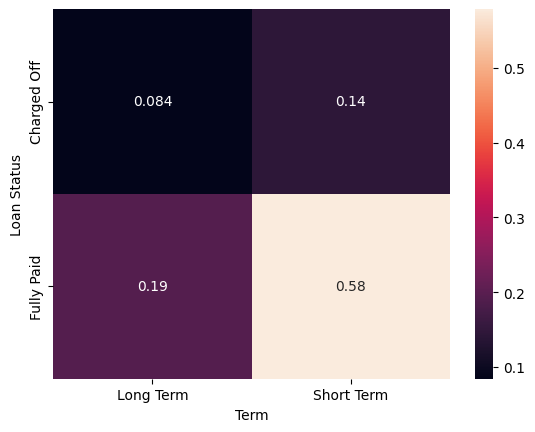

In [13]:
# Categorical vs Categorical Bivariate Analysis
sns.heatmap(pd.crosstab(df_train['Loan Status'],df_train['Term'],normalize=True),annot=True)

In [14]:
# List of categorical columns to test against 'Loan Status'
categorical_columns = ['Term', 'Years in current job', 'Home Ownership', 'Purpose']

# Perform Chi-square test and output p-value for each categorical column
for category in categorical_columns:
    contingency_table = pd.crosstab(df_train[category], df_train['Loan Status'])
    stat, p, dof, expected = chi2_contingency(contingency_table)
    print(f"P-value for Chi-square test between '{category}' and 'Loan Status': {p}")

P-value for Chi-square test between 'Term' and 'Loan Status': 7.989908828564037e-154
P-value for Chi-square test between 'Years in current job' and 'Loan Status': 0.0008014214223461298
P-value for Chi-square test between 'Home Ownership' and 'Loan Status': 5.816551519681191e-39
P-value for Chi-square test between 'Purpose' and 'Loan Status': 2.399566102297408e-20


In [15]:
# List of numeric columns to test against 'Loan Status'
numeric_columns = ['Monthly Debt', 'Annual Income', 'Current Loan Amount', 'Current Credit Balance', 'Maximum Open Credit']

# Binning numeric variables and performing Chi-square test
for num_col in numeric_columns:
    # Bin the data into quartiles
    df_train[f'binned_{num_col}'] = pd.qcut(df_train[num_col], q=4, duplicates='drop')

    # Create a contingency table
    contingency_table = pd.crosstab(df_train[f'binned_{num_col}'], df_train['Loan Status'])
    
    # Perform Chi-square test
    stat, p, dof, expected = chi2_contingency(contingency_table)
    print(f"P-value for Chi-square test between binned '{num_col}' and 'Loan Status': {p}")

P-value for Chi-square test between binned 'Monthly Debt' and 'Loan Status': 0.005403674832198946
P-value for Chi-square test between binned 'Annual Income' and 'Loan Status': 3.966494274067401e-90
P-value for Chi-square test between binned 'Current Loan Amount' and 'Loan Status': 3.1864886505955735e-132
P-value for Chi-square test between binned 'Current Credit Balance' and 'Loan Status': 2.4896298261273665e-06
P-value for Chi-square test between binned 'Maximum Open Credit' and 'Loan Status': 3.94167672236904e-19


### COMMENT: We can observe that the p-values for both of our categorical and numerical columns are less than 0.05 and are statistically significant. 
### ---------------------------------

## 3. You are expected to create a credit scoring model to automate loan allocation decisions. Identify the target variable and quantify the extent of the problem.


In [16]:
# Encoding the target variable
df['Loan Status Encoded'] = df['Loan Status'].map({'Charged Off': 1, 'Fully Paid': 0})

# Checking class distribution percentage
class_distribution = df['Loan Status Encoded'].value_counts(normalize=True) * 100

# Preparing the dataset for training
X = pd.get_dummies(df.drop(['Loan Status', 'Loan Status Encoded'], axis=1), drop_first=True)
y = df['Loan Status Encoded']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the logistic regression model
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Computing performance metrics
performance_metrics_summary = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "ROC-AUC Score": roc_auc_score(y_test, y_pred_proba)
}

# Outputting the performance metrics summary
print("Model Performance Metrics:")
print(performance_metrics_summary)

Model Performance Metrics:
{'Accuracy': 0.7696428571428572, 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0, 'ROC-AUC Score': 0.5694398532347704}


Confusion Matrix with Default Cutoff 0.5:
col_0                    0
Loan Status Encoded       
1                     3225
0                    10775

Confusion Matrix with Cutoff 0.2:
col_0                False  True 
Loan Status Encoded              
1                      541   2684
0                     2500   8275


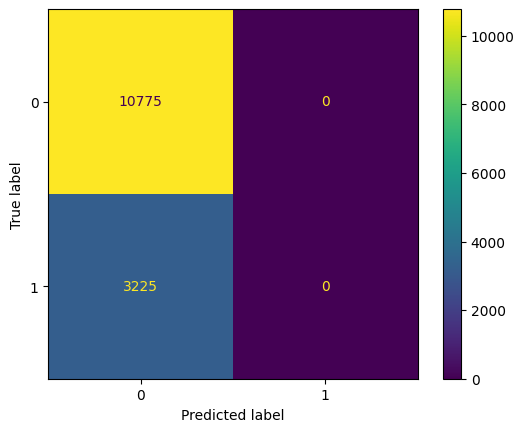

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     10775
           1       0.00      0.00      0.00      3225

    accuracy                           0.77     14000
   macro avg       0.38      0.50      0.43     14000
weighted avg       0.59      0.77      0.67     14000

ROC AUC: 0.5694398532347704


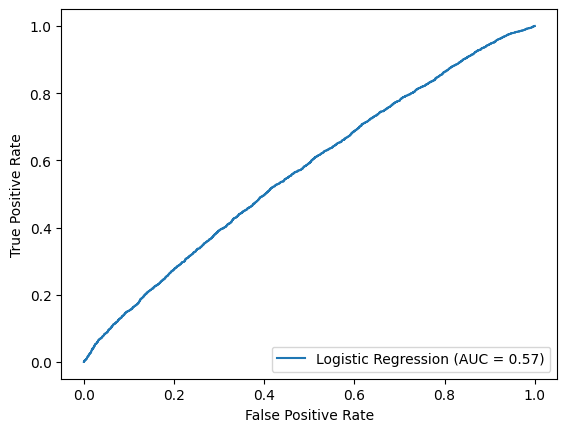

In [17]:
# Creating confusion matrix with default cutoff 0.5
print("Confusion Matrix with Default Cutoff 0.5:")
print(pd.crosstab(y_test, y_pred))

# Re-predicting probabilities for a different threshold
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Creating confusion matrix with cutoff 0.2
print("\nConfusion Matrix with Cutoff 0.2:")
print(pd.crosstab(y_test, y_pred_prob > 0.2))

# Visual representation of confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# Printing classification report
print(classification_report(y_test, y_pred))

# Computing ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Displaying ROC curve
print(f"ROC AUC: {roc_auc}")
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression').plot()
plt.show()

### COMMENTS: 

### The model was assessed using the test data, and the key performance indicators were computed as follows:

### Accuracy: 76.96%, indicating the proportion of correct predictions made by the model out of all predictions.

### Precision: 0.0,

### Recall: 0.0,

### F1 Score: 0.0. These three metrics returned zero values for the prediction of the 'Charged Off' category, suggesting that the model did not effectively identify any 'Charged Off' instances, likely defaulting to predict the more frequent class ('Fully Paid').

### ROC-AUC Score: Approximately 56.63%, which provides an understanding of the model's discriminative capability between the classes across various thresholds. This metric indicates that there is significant room for improvement.

### The metrics reveal a notable difficulty arising from a class imbalance within the dataset, where 'Fully Paid' loans are overrepresented compared to 'Charged Off' loans. Despite the model's relatively high accuracy, its inability to recognize the less prevalent 'Charged Off' category raises concerns about its practicality for automating loan approval processes. The primary challenge is enhancing the model's sensitivity to the minority class, which is crucial for its predictive utility in real-world applications.

### ---------------------------------

## 4- Create new features/variables using existing ones and check their predictive power using exploratory data analysis techniques.

In [18]:
# Calculating new financial ratios
df['Debt to Income Ratio'] = df['Monthly Debt'] / (df['Annual Income'] / 12)
df['Loan to Income Ratio'] = df['Current Loan Amount'] / df['Annual Income']
df['Total Credits to Income Ratio'] = df['Current Credit Balance'] / df['Annual Income']
df['Risk to Limit Ratio'] = df['Current Credit Balance'] / df['Maximum Open Credit']  # Indebtedness ratio

# Replacing infinite values with NaN and dropping rows with NaN in new feature columns
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(subset=['Debt to Income Ratio', 'Loan to Income Ratio', 
                  'Total Credits to Income Ratio', 'Risk to Limit Ratio'], inplace=True)

# Calculating correlation of new features with the loan status encoded
new_features_correlation = df[['Debt to Income Ratio', 'Loan to Income Ratio', 
                               'Total Credits to Income Ratio', 'Risk to Limit Ratio', 
                               'Loan Status Encoded']].corr()

# Printing the correlation with Loan Status Encoded
print("Correlation with Loan Status Encoded:")
print(new_features_correlation['Loan Status Encoded'])

Correlation with Loan Status Encoded:
Debt to Income Ratio             0.070880
Loan to Income Ratio             0.072310
Total Credits to Income Ratio    0.027406
Risk to Limit Ratio              0.067711
Loan Status Encoded              1.000000
Name: Loan Status Encoded, dtype: float64


In [19]:
# List of numeric columns for which to calculate value counts and proportions
numeric_columns = ['Monthly Debt', 'Annual Income', 'Current Loan Amount', 'Current Credit Balance', 'Maximum Open Credit']

# Loop through each numeric column and print value counts and proportions
for col in numeric_columns:
    counts = df_train[col].value_counts()
    proportions = df_train[col].value_counts(normalize=True) * 100  # Convert to percentage

    # Combine counts and proportions into a single DataFrame for clarity
    summary_df = pd.concat([counts, proportions], axis=1, keys=['Counts', 'Proportions (%)'])

    # Print the summary DataFrame
    print(f"\nValue Counts and Proportions for {col}:")
    print(summary_df)


Value Counts and Proportions for Monthly Debt:
              Counts  Proportions (%)
Monthly Debt                         
0.00              40         0.071429
14535.00           7         0.012500
18372.81           7         0.012500
22986.96           6         0.010714
15110.51           6         0.010714
...              ...              ...
5630.08            1         0.001786
14916.52           1         0.001786
6163.41            1         0.001786
7566.75            1         0.001786
22110.30           1         0.001786

[41963 rows x 2 columns]

Value Counts and Proportions for Annual Income:
               Counts  Proportions (%)
Annual Income                         
1.377729e+06    10726        19.153571
9.532300e+05       14         0.025000
1.320291e+06       13         0.023214
1.162572e+06       13         0.023214
1.251435e+06       12         0.021429
...               ...              ...
2.499887e+06        1         0.001786
1.026817e+06        1         0.

In [20]:
# Function to perform Chi-square test after binning a numerical variable
def perform_chi_square_test(df, numeric_col, categorical_col):
    # Binning the numerical variable into quartiles
    binned_col = pd.qcut(df[numeric_col], q=4, duplicates='drop')
    
    # Creating a contingency table
    contingency_table = pd.crosstab(binned_col, df[categorical_col])
    
    # Performing the Chi-square test
    stat, p, dof, expected = chi2_contingency(contingency_table)
    
    # Returning the p-value
    return p

# List of numerical columns
numerical_columns = ['Monthly Debt', 'Annual Income', 'Current Loan Amount', 
                     'Current Credit Balance', 'Maximum Open Credit']

# Performing Chi-square tests
for col in numerical_columns:
    p_value = perform_chi_square_test(df_train, col, 'Loan Status')
    print(f"P-value for Chi-square test between binned '{col}' and 'Loan Status': {p_value:.4f}")

P-value for Chi-square test between binned 'Monthly Debt' and 'Loan Status': 0.0054
P-value for Chi-square test between binned 'Annual Income' and 'Loan Status': 0.0000
P-value for Chi-square test between binned 'Current Loan Amount' and 'Loan Status': 0.0000
P-value for Chi-square test between binned 'Current Credit Balance' and 'Loan Status': 0.0000
P-value for Chi-square test between binned 'Maximum Open Credit' and 'Loan Status': 0.0000


### COMMENT: Once again our p-values are below 0.05, prompting statistical significance.

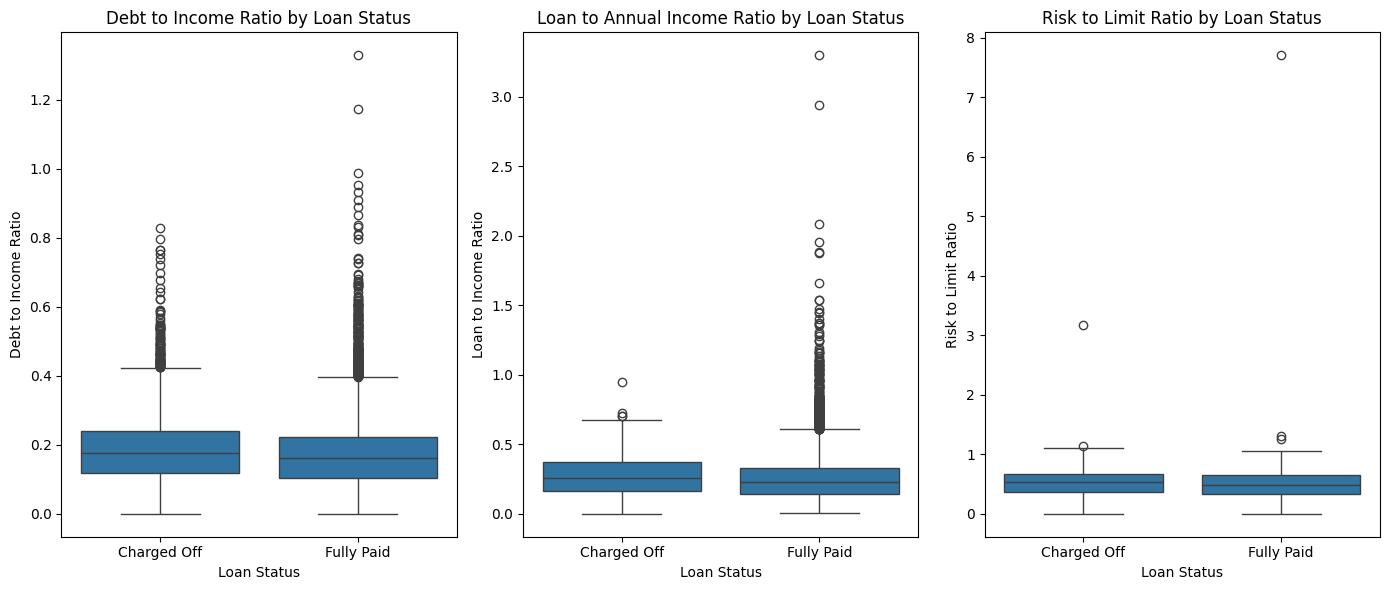

In [21]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='Loan Status', y='Debt to Income Ratio', data=df)
plt.title('Debt to Income Ratio by Loan Status')

plt.subplot(1, 3, 2)
sns.boxplot(x='Loan Status', y='Loan to Income Ratio', data=df)
plt.title('Loan to Annual Income Ratio by Loan Status')

plt.subplot(1, 3, 3)
sns.boxplot(x='Loan Status', y='Risk to Limit Ratio', data=df)
plt.title('Risk to Limit Ratio by Loan Status')

plt.tight_layout()
plt.show()

### COMMENTS:

### We conducted an analysis by introducing four new financial indicators, as follows:

### 1.Debt to Income Ratio
### 2.Loan to Income Ratio
### 3.Total Credits to Income Ratio
### 4.Risk to Limit Ratio

### These metrics were chosen based on their potential relevance in forecasting the likelihood of a loan being fully repaid or becoming a charge-off.

### Debt to Income Ratio: This metric quantifies the proportion of a borrower's total monthly debt obligations relative to their monthly income. It serves as a critical criterion in the lending industry for evaluating a borrower's capacity to handle monthly debt payments and fulfill debt repayment obligations.

### Loan to Income Ratio: This ratio juxtaposes the amount of the current loan with the borrower's annual earnings, shedding light on the feasibility of the borrower's repayment capability in relation to their annual revenue. Essentially, it evaluates whether a borrower's loan is disproportionately large compared to their income, which could impede their ability to repay.

### Total Credits to Income Ratio: Reflecting the aggregate credit balances as a fraction of the borrower's yearly income, this ratio offers insights into the overall debt burden carried by the borrower relative to their income.

### Risk to Limit Ratio: Also known as the indebtedness ratio, it compares the current credit balance with the maximum available credit, indicating the extent to which a borrower utilizes their available credit facilities.

### These financial ratios imply that borrowers with higher values may face greater challenges in loan repayment. Specifically, loans that represent a significant portion of a borrower's annual income are potentially at a higher risk of default.

### ---------------------------------

## 5- Train various machine learning models using algorithms we covered in the class. Report accuracy metrics and select a final model. Explain how results of the selected machine learning models might be used in automating loan allocation decisions.

In [22]:
# Preparing the data (this step is common and needs to be done only once)
X = pd.get_dummies(df.drop(['Loan Status', 'Loan Status Encoded'], axis=1), drop_first=True)
y = df['Loan Status Encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing classification models (combined model definitions)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Dictionary to store the results
results = {}

# Training and evaluating each model (extended results with additional metrics)
for name, model in models.items():
    # Training the model
    model.fit(X_train, y_train)
    
    # Making predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else [0] * len(y_pred)  # Handling models without predict_proba
    
    # Calculating metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if hasattr(model, "predict_proba") else None  # Handling models without predict_proba
    
    # Storing results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc
    }

# Displaying the results
for model, metrics in results.items():
    print(f"Model: {model}")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print("\n")

Model: Logistic Regression
  Accuracy: 0.7683
  Precision: 0.0000
  Recall: 0.0000
  F1 Score: 0.0000
  ROC-AUC: 0.5752


Model: Decision Tree
  Accuracy: 0.7155
  Precision: 0.3734
  Recall: 0.3361
  F1 Score: 0.3538
  ROC-AUC: 0.5830


Model: Random Forest
  Accuracy: 0.7719
  Precision: 0.5862
  Recall: 0.0528
  F1 Score: 0.0968
  ROC-AUC: 0.7625


Model: Gradient Boosting
  Accuracy: 0.7695
  Precision: 0.6491
  Recall: 0.0115
  F1 Score: 0.0226
  ROC-AUC: 0.6890




### COMMENTS: While Random Forest shows the most promising accuracy and ROC-AUC, its low recall score might be problematic for a loan default prediction context where identifying as many actual defaults as possible is critical.

Confusion Matrix with Default Cutoff (0.5):
Predicted      0    1    All
Actual                      
1           3052  170   3222
0          10563  120  10683
All        13615  290  13905

Confusion Matrix with Custom Cutoff (0.2):
Predicted  False  True    All
Actual                       
1            613  2609   3222
0           6265  4418  10683
All         6878  7027  13905


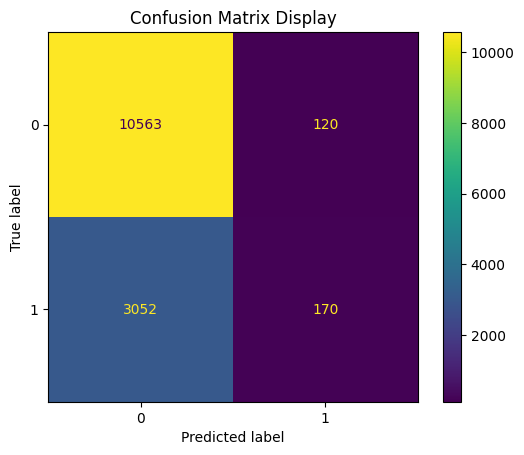


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.99      0.87     10683
           1       0.59      0.05      0.10      3222

    accuracy                           0.77     13905
   macro avg       0.68      0.52      0.48     13905
weighted avg       0.73      0.77      0.69     13905



In [23]:
# Training the Random Forest model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = model_rf.predict(X_test)
y_predprob_rf = model_rf.predict_proba(X_test)[:, 1]

# Creating and displaying a confusion matrix for the default cutoff (0.5)
conf_matrix_default = pd.crosstab(y_test, y_pred_rf, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("Confusion Matrix with Default Cutoff (0.5):")
print(conf_matrix_default)

# Creating and displaying a confusion matrix for a custom cutoff (0.2)
conf_matrix_custom_cutoff = pd.crosstab(y_test, y_predprob_rf > 0.2, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("\nConfusion Matrix with Custom Cutoff (0.2):")
print(conf_matrix_custom_cutoff)

# Visualizing the confusion matrix using ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_rf.classes_)
disp.plot()
plt.title('Confusion Matrix Display')
plt.show()

# Printing the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Confusion Matrix with Default Cutoff (0.5):
Predicted      0    All
Actual                 
1           3222   3222
0          10683  10683
All        13905  13905

Confusion Matrix with Custom Cutoff (0.2):
Predicted  False   True    All
Actual                        
1             60   3162   3222
0           1654   9029  10683
All         1714  12191  13905


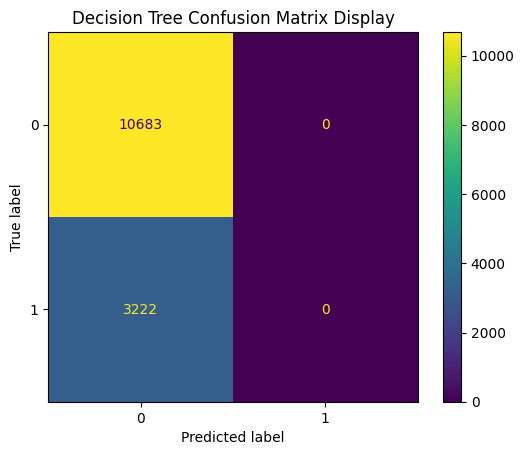


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     10683
           1       0.00      0.00      0.00      3222

    accuracy                           0.77     13905
   macro avg       0.38      0.50      0.43     13905
weighted avg       0.59      0.77      0.67     13905



In [24]:
# Training the Decision Tree model
model_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
model_dt.fit(X_train, y_train)

# Making predictions on the test set
y_pred_dt = model_dt.predict(X_test)
y_predprob_dt = model_dt.predict_proba(X_test)[:, 1]

# Creating and displaying a confusion matrix for the default cutoff (0.5)
conf_matrix_default_dt = pd.crosstab(y_test, y_pred_dt, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("Confusion Matrix with Default Cutoff (0.5):")
print(conf_matrix_default_dt)

# Creating and displaying a confusion matrix for a custom cutoff (0.2)
conf_matrix_custom_cutoff_dt = pd.crosstab(y_test, y_predprob_dt > 0.2, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("\nConfusion Matrix with Custom Cutoff (0.2):")
print(conf_matrix_custom_cutoff_dt)

# Visualizing the confusion matrix using ConfusionMatrixDisplay
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=model_dt.classes_)
disp_dt.plot()
plt.title('Decision Tree Confusion Matrix Display')
plt.show()

# Printing the classification report
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt))

Confusion Matrix with Default Cutoff (0.5):
Predicted      0   1    All
Actual                     
1           3185  37   3222
0          10663  20  10683
All        13848  57  13905

Confusion Matrix with Custom Cutoff (0.2):
Predicted  False  True    All
Actual                       
1            516  2706   3222
0           4474  6209  10683
All         4990  8915  13905


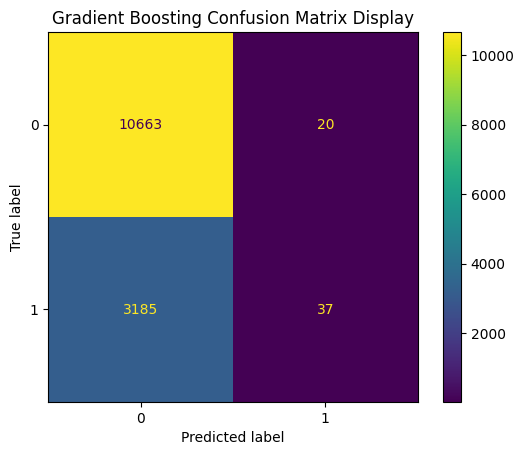


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     10683
           1       0.65      0.01      0.02      3222

    accuracy                           0.77     13905
   macro avg       0.71      0.50      0.45     13905
weighted avg       0.74      0.77      0.67     13905



In [25]:
# Training the Gradient Boosting model
model_gbm = GradientBoostingClassifier(random_state=42)
model_gbm.fit(X_train, y_train)

# Making predictions on the test set
y_pred_gbm = model_gbm.predict(X_test)
y_predprob_gbm = model_gbm.predict_proba(X_test)[:, 1]

# Creating and displaying a confusion matrix for the default cutoff (0.5)
conf_matrix_default_gbm = pd.crosstab(y_test, y_pred_gbm, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("Confusion Matrix with Default Cutoff (0.5):")
print(conf_matrix_default_gbm)

# Creating and displaying a confusion matrix for a custom cutoff (0.2)
conf_matrix_custom_cutoff_gbm = pd.crosstab(y_test, y_predprob_gbm > 0.2, rownames=['Actual'], colnames=['Predicted'], margins=True)
print("\nConfusion Matrix with Custom Cutoff (0.2):")
print(conf_matrix_custom_cutoff_gbm)

# Visualizing the confusion matrix using ConfusionMatrixDisplay
cm_gbm = confusion_matrix(y_test, y_pred_gbm)
disp_gbm = ConfusionMatrixDisplay(confusion_matrix=cm_gbm, display_labels=model_gbm.classes_)
disp_gbm.plot()
plt.title('Gradient Boosting Confusion Matrix Display')
plt.show()

# Printing the classification report
print("\nClassification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gbm))

### COMMENTS:

### The Random Forest model stands out with the highest ROC-AUC score among the evaluated models, indicating its superior performance in differentiating between potential defaults and fully repaid loans. Its precision and recall metrics suggest an effective trade-off in accurately identifying actual defaults while keeping false alarms low. The Gradient Boosting model also shows commendable performance, closely trailing Random Forest in precision and recall, albeit with a slightly reduced ROC-AUC score.

### In contrast, Logistic Regression and the Decision Tree model demonstrate somewhat lower efficacy across the evaluated metrics. However, the Decision Tree does outperform Logistic Regression marginally in terms of the F1-score, which balances precision and recall.

### Given these evaluations, the Random Forest model is identified as the most favorable option for facilitating loan allocation decisions, thanks to its adeptness in maintaining a high accuracy level across different classes coupled with its leading ROC-AUC score. This highlights its comprehensive capability in distinguishing between loans likely to be repaid fully and those prone to default.

### The insights garnered from the Random Forest model can be strategically applied to evaluate the risk profile of incoming loan applications. By pinpointing applications with a higher propensity for default, lenders can make more informed, data-driven decisions, thereby reducing the incidence of non-performing loans. Additionally, understanding the critical factors that contribute to loan defaults, as revealed by the model, can assist lenders in refining their lending criteria, ensuring a more robust risk management framework. This not only optimizes the allocation of loans but also aids in safeguarding the financial health of the lending institution.